In [30]:
import pandas as pd
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', 50)

In [31]:
train_feature_file = "/home/eminda/project/DengAI/DengAI/dengue_features_train.csv"
train_label_file ="/home/eminda/project/DengAI/DengAI/dengue_labels_train.csv"
test_feature_file = "/home/eminda/project/DengAI/DengAI/dengue_features_test.csv"

train_features = pd.read_csv(train_feature_file)
train_labels = pd.read_csv(train_label_file)

In [32]:
sj_train_features = train_features[train_features['city']=='sj']
sj_train_labels = train_labels[train_labels['city']=='sj']

In [33]:
iq_train_features = train_features[train_features['city']=='iq']
iq_train_labels = train_labels[train_labels['city']=='iq']

In [34]:
sj_train_features.drop('city',axis=1, inplace = True)
sj_train_features.drop('year', axis=1, inplace = True)
sj_train_features.drop('weekofyear', axis=1, inplace = True)
sj_train_features.drop('week_start_date', axis=1, inplace = True)
iq_train_features.drop('city',axis=1, inplace = True)
iq_train_features.drop('year', axis=1, inplace = True)
iq_train_features.drop('weekofyear', axis=1, inplace = True)
iq_train_features.drop('week_start_date', axis=1, inplace = True)

/home/eminda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eminda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eminda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

In [35]:
pd.isnull(sj_train_features).any()

ndvi_ne                                  True
ndvi_nw                                  True
ndvi_se                                  True
ndvi_sw                                  True
precipitation_amt_mm                     True
reanalysis_air_temp_k                    True
reanalysis_avg_temp_k                    True
reanalysis_dew_point_temp_k              True
reanalysis_max_air_temp_k                True
reanalysis_min_air_temp_k                True
reanalysis_precip_amt_kg_per_m2          True
reanalysis_relative_humidity_percent     True
reanalysis_sat_precip_amt_mm             True
reanalysis_specific_humidity_g_per_kg    True
reanalysis_tdtr_k                        True
station_avg_temp_c                       True
station_diur_temp_rng_c                  True
station_max_temp_c                       True
station_min_temp_c                       True
station_precip_mm                        True
dtype: bool

In [36]:
sj_train_features.fillna(method = 'ffill',inplace = True)
sj_train_labels.fillna(method = 'ffill',inplace = True)
iq_train_features.fillna(method = 'ffill',inplace = True)
iq_train_labels.fillna(method = 'ffill',inplace = True)

/home/eminda/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


Text(0.5,1,'San Juan Variable Correlations')

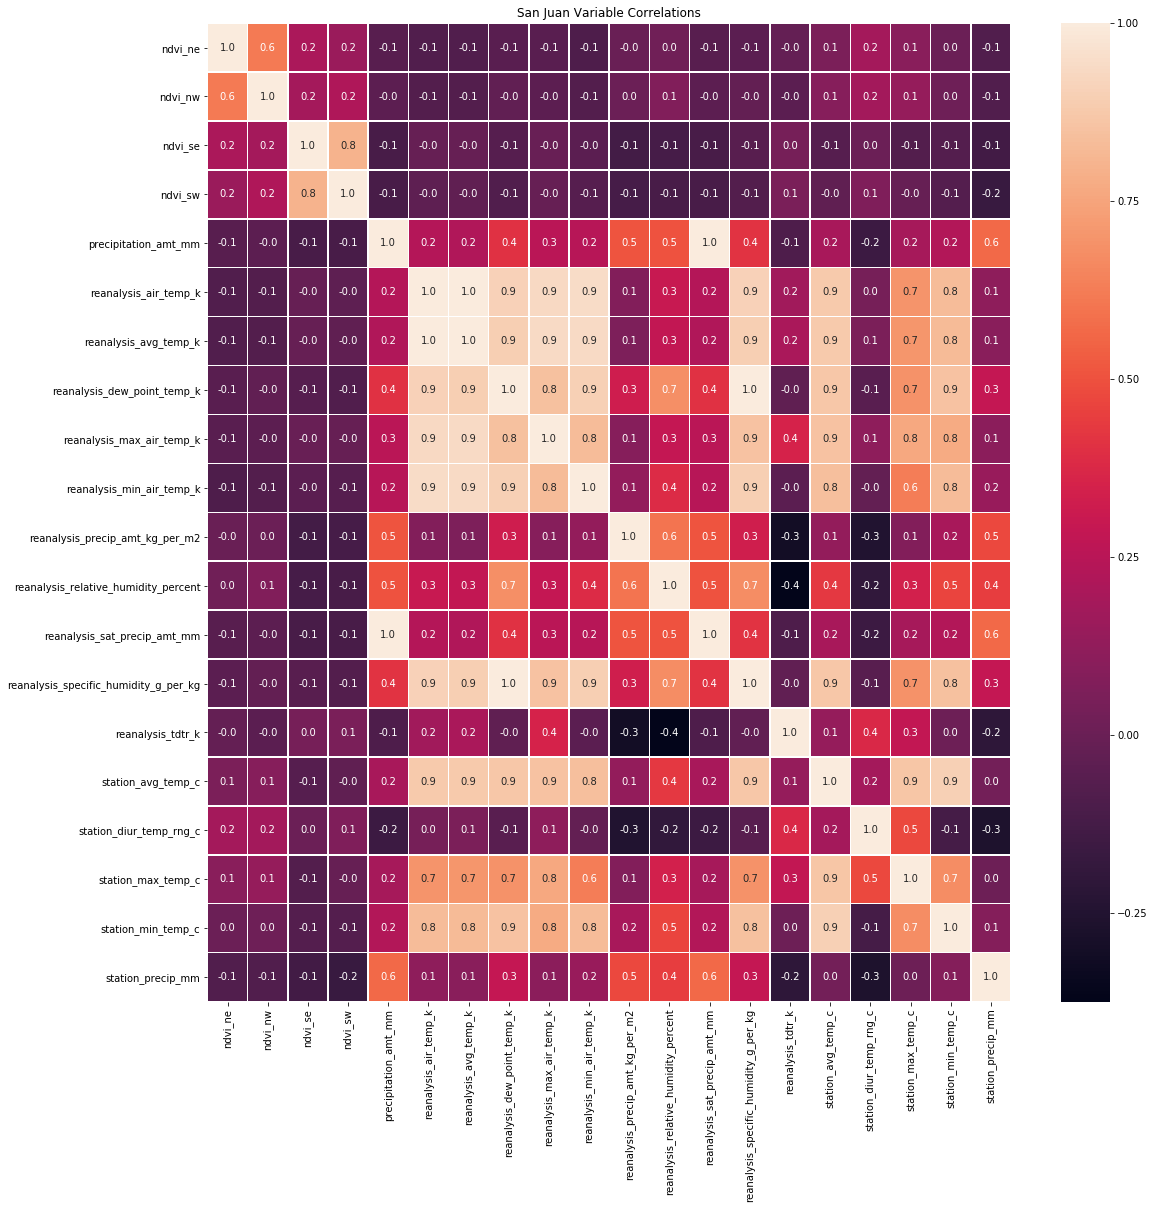

In [37]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(sj_train_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('San Juan Variable Correlations')


In [38]:
(sj_train_features.iloc[1:]).corrwith((sj_train_labels['total_cases']).iloc[:-1])

ndvi_ne                                  0.003988
ndvi_nw                                  0.059001
ndvi_se                                 -0.121070
ndvi_sw                                  0.040418
precipitation_amt_mm                     0.056185
reanalysis_air_temp_k                    0.178592
reanalysis_avg_temp_k                    0.171717
reanalysis_dew_point_temp_k              0.200103
reanalysis_max_air_temp_k                0.191849
reanalysis_min_air_temp_k                0.184485
reanalysis_precip_amt_kg_per_m2          0.106209
reanalysis_relative_humidity_percent     0.141306
reanalysis_sat_precip_amt_mm             0.056185
reanalysis_specific_humidity_g_per_kg    0.204370
reanalysis_tdtr_k                       -0.066337
station_avg_temp_c                       0.193647
station_diur_temp_rng_c                  0.035492
station_max_temp_c                       0.187007
station_min_temp_c                       0.173845
station_precip_mm                        0.050097


### from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

columns_of_interest_sj = ['reanalysis_dew_point_temp_k','reanalysis_specific_humidity_g_per_kg','station_avg_temp_c','reanalysis_relative_humidity_percent']

X = sj_train_features
y = sj_train_labels['total_cases']

train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

forest_model = RandomForestRegressor()
forest_model.fit(train_X**2, train_y)
melb_preds = (forest_model.predict(val_X**2))
print(mean_absolute_error(val_y, melb_preds))

23.752941176470586


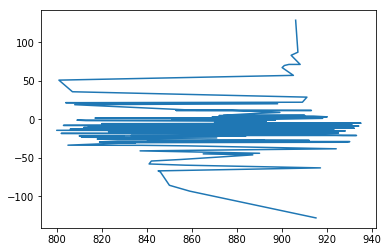

In [39]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error 
from sklearn.model_selection import train_test_split

columns_of_interest_sj = []

columns_of_interest_sj.append('reanalysis_dew_point_temp_k')
columns_of_interest_sj.append('reanalysis_specific_humidity_g_per_kg')
columns_of_interest_sj.append('station_avg_temp_c')
columns_of_interest_sj.append('reanalysis_relative_humidity_percent')
columns_of_interest_sj.append('ndvi_se')
columns_of_interest_sj.append('station_avg_temp_c')

X = sj_train_features[columns_of_interest_sj] 
y = sj_train_labels['total_cases']

# train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
train_X = X.head(800)
val_X = X.tail(X.shape[0] - 800)

train_y = y.head(800)
val_y = y.tail(y.shape[0]-800)

# iq_train_subtrain = iq_train.head(400)
# iq_train_subtest = iq_train.tail(iq_train.shape[0] - 400)

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
melb_preds = (forest_model.predict(val_X))
print(mean_absolute_error(val_y, melb_preds))

import matplotlib.pyplot as plt
plt.plot((val_y.subtract(melb_preds)).sort_values())
plt.show()

Text(0.5,1,'San Juan Variable Correlations')

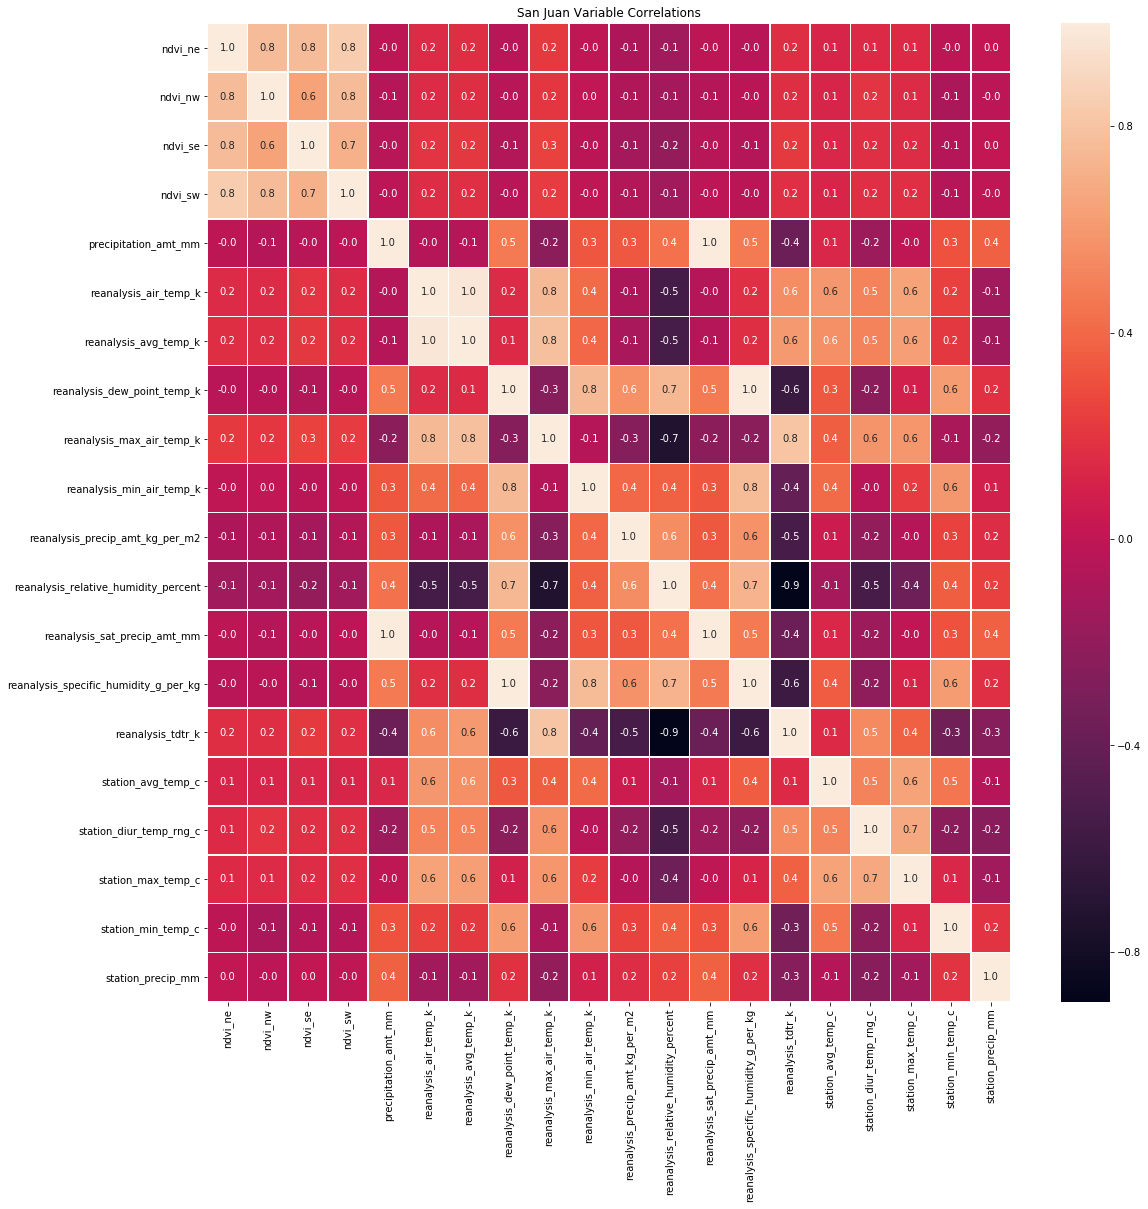

In [40]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(iq_train_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.title('San Juan Variable Correlations')

In [41]:
(iq_train_features.iloc[1:]).corrwith((iq_train_labels['total_cases']**0.1).iloc[:-1])

ndvi_ne                                 -0.027482
ndvi_nw                                 -0.019146
ndvi_se                                 -0.070010
ndvi_sw                                 -0.051790
precipitation_amt_mm                     0.111885
reanalysis_air_temp_k                    0.044861
reanalysis_avg_temp_k                    0.029713
reanalysis_dew_point_temp_k              0.315091
reanalysis_max_air_temp_k               -0.135595
reanalysis_min_air_temp_k                0.223308
reanalysis_precip_amt_kg_per_m2          0.130679
reanalysis_relative_humidity_percent     0.238773
reanalysis_sat_precip_amt_mm             0.111885
reanalysis_specific_humidity_g_per_kg    0.322483
reanalysis_tdtr_k                       -0.212699
station_avg_temp_c                       0.148981
station_diur_temp_rng_c                 -0.124825
station_max_temp_c                       0.019530
station_min_temp_c                       0.265331
station_precip_mm                        0.106286


In [42]:
pd.isnull(iq_train_features).any()

ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_temp_c                       False
station_min_temp_c                       False
station_precip_mm                        False
dtype: bool

In [43]:
columns_of_interest_iq = ['station_min_temp_c','reanalysis_tdtr_k','reanalysis_specific_humidity_g_per_kg','reanalysis_relative_humidity_percent','reanalysis_min_air_temp_k','reanalysis_dew_point_temp_k']

X_iq = iq_train_features[columns_of_interest_iq]
y_iq = iq_train_labels['total_cases']

train_X_iq, val_X_iq, train_y_iq, val_y_iq = train_test_split(X_iq, y_iq,random_state = 0)

forest_model_iq = RandomForestRegressor()
forest_model_iq.fit(train_X_iq, train_y_iq**0.2)
melb_preds_iq = (forest_model_iq.predict(val_X_iq)) **(10/2)
print(mean_absolute_error(val_y_iq, melb_preds_iq))

6.466844647485676


In [44]:
sub_features = pd.read_csv(test_feature_file)
sj_sub_features = sub_features[sub_features['city']=='sj']
iq_sub_features = sub_features[sub_features['city']=='iq']

In [45]:
sj_sub_features.fillna(method = 'ffill',inplace = True)

/home/eminda/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [46]:
iq_sub_features.fillna(method = 'ffill',inplace = True)

/home/eminda/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [47]:
sj_sub_features.drop('city',axis=1, inplace = True)
sj_sub_features.drop('year', axis=1, inplace = True)
sj_sub_features.drop('weekofyear', axis=1, inplace = True)
sj_sub_features.drop('week_start_date', axis=1, inplace = True)
iq_sub_features.drop('city',axis=1, inplace = True)
iq_sub_features.drop('year', axis=1, inplace = True)
iq_sub_features.drop('weekofyear', axis=1, inplace = True)
iq_sub_features.drop('week_start_date', axis=1, inplace = True)

/home/eminda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/eminda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/eminda/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports u

In [48]:
sj_predit = forest_model.predict(sj_sub_features[columns_of_interest_sj])**5
t=pd.DataFrame((sj_predit).astype(int)).to_csv("./sj_3.csv")

In [49]:
iq_predict = forest_model_iq.predict(iq_sub_features[columns_of_interest_iq])**5
pd.DataFrame((iq_predict).astype(int)).to_csv("./iq_3.csv")